# $Yvette$ $WorkBook$

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error,explained_variance_score
from sklearn.preprocessing import PolynomialFeatures
import wrangle as w

import model as m
import env

In [2]:
df = w.get_zillow_data()

In [3]:
df.log_error.describe()

count    52319.000000
mean         0.018136
std          0.176904
min         -4.655420
25%         -0.024702
50%          0.006935
75%          0.040599
max          5.262999
Name: log_error, dtype: float64

In [4]:
df= w.zillow_prep(df)

In [5]:
df.shape

(50293, 35)

In [6]:
df.log_error.isnull().value_counts()

False    50293
Name: log_error, dtype: int64

In [7]:
train,validate,test = w.split(df)

In [8]:
validate.log_error.isnull().value_counts()

False    12071
Name: log_error, dtype: int64

In [9]:
validate.shape

(12071, 35)

In [10]:
test.shape

(10059, 35)

In [11]:
train, test, validate, train_scaled, validate_scaled, test_scaled = m.create_cluster('cluster_loc', train,validate, test,['longitude', 'latitude','tax_value'],4)


In [12]:
validate_scaled.log_error.isnull().value_counts()

False    12071
Name: log_error, dtype: int64

In [13]:
test.log_error.isnull().value_counts()

False    12071
Name: log_error, dtype: int64

In [14]:
test_scaled.log_error.isnull().value_counts()

False    10059
Name: log_error, dtype: int64

In [15]:
test_scaled.shape

(10059, 40)

In [16]:
validate.shape

(10059, 40)

In [17]:
train, test, validate, train_scaled, validate_scaled, test_scaled = m.create_cluster('cluster_price_size', train,validate, test,['taxamount', 'sqft', 'lot_sqft'],4)


In [18]:
train, test, validate, train_scaled, validate_scaled, test_scaled = m.create_cluster('cluster_delinquency_value', train,validate, test,['tax_value', 'sqft','lot_sqft','has_taxdelinquency'],4)


In [19]:
train


parcelid  bedrooms  bathrooms  calculatedbathnbr  fullbathcnt   age  \
11303  14498262       4.0        2.5                2.5          2.0  27.0   
26458  12851739       3.0        2.0                2.0          2.0  55.0   
28486  11276661       4.0        2.0                2.0          2.0  24.0   
29814  10902464       3.0        2.0                2.0          2.0  66.0   
4406   10890115       3.0        2.0                2.0          2.0  76.0   
...         ...       ...        ...                ...          ...   ...   
16553  11445017       3.0        2.0                2.0          2.0  62.0   
18488  13891248       6.0        3.0                3.0          3.0  62.0   
17080  11292243       4.0        2.0                2.0          2.0  63.0   
14801  17172485       2.0        1.0                1.0          1.0  65.0   
40175  12334791       4.0        2.0                2.0          2.0  68.0   

       yearbuilt  has_basement  has_deck  has_fireplace  ...  \
11303     1990.0             0         0              0  ...   
26458     1962.0             0         0              0  ...   
28486     1993.0             0         0              0  ...   
29814     1951.0             0         0              0  ...   
4406      1941.0             0         0              0  ...   
...          ...           ...       ...            ...  ...   
16553     1955.0             0         0              0  ...   
18488     1955.0             0         0              0  ...   
17080     1954.0             0         0              0  ...   
14801     1952.0             0         0              1  ...   
40175     1949.0             0         0              0  ...   

       cluster_price_size  cluster_price_size_0  cluster_price_size_1  \
11303                   0                     1                     0   
26458                   3                     0                     0   
28486                   3                     0                     0   
29814                   3                     0                     0   
4406                    3                     0                     0   
...                   ...                   ...                   ...   
16553                   0                     1                     0   
18488                   1                     0                     1   
17080                   3                     0                     0   
14801                   3                     0                     0   
40175                   3                     0                     0   

       cluster_price_size_2  cluster_price_size_3  cluster_delinquency_value  \
11303                     0                     0                          2   
26458                     0                     1                          0   
28486                     0                     1                          0   
29814                     0                     1                          0   
4406                      0                     1                          0   
...                     ...                   ...                        ...   
16553                     0                     0                          0   
18488                     0                     0                          2   
17080                     0                     1                          0   
14801                     0                     1                          2   
40175                     0                     1                          0   

      cluster_delinquency_value_0 cluster_delinquency_value_1  \
11303                           0                           0   
26458                           1                           0   
28486                           1                           0   
29814                           1                           0   
4406                            1                           0   
...                           ...                         ...   
16553   

In [20]:
validate_scaled.log_error.isnull().value_counts()

False    12071
Name: log_error, dtype: int64

## Question 1: Is threre any difference in log_error in homes with less than or equal to 5000sqft and homes above 5000sqft

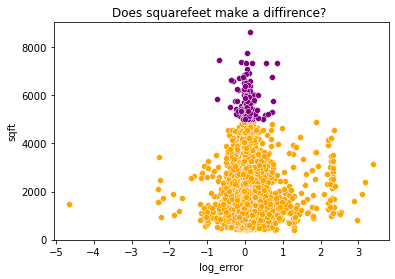

In [21]:
sns.scatterplot(y='sqft', x='log_error',
                data=train[train.sqft<= 5000], color='orange')

sns.scatterplot(y='sqft', x='log_error',
                data=train[train.sqft> 5000], 
                color='purple')

plt.title("Does squarefeet make a diffirence? ")
plt.show()

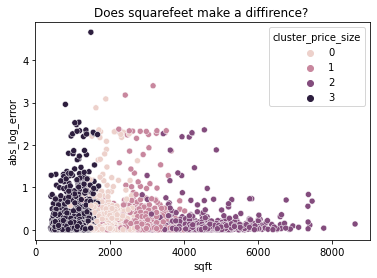

In [22]:
sns.scatterplot(x='sqft', y='abs_log_error',
                data=train, hue= train.cluster_price_size)




plt.title("Does squarefeet make a diffirence? ")
plt.show()


#running stats test for these-first checking variance
stat, p = levene(loc_zero.log_error, loc_one.log_error, loc_two.log_error, loc_three.log_error)
stat, p


### clusters 1,2,3 have more abs log error than cluster 0

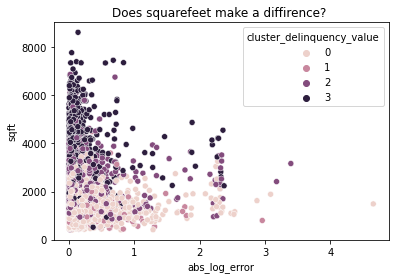

In [23]:
sns.scatterplot(y='sqft', x='abs_log_error',
                data=train, hue= train.cluster_delinquency_value)




plt.title("Does squarefeet make a diffirence? ")
plt.show()

### cluster 2 has more log error and maybe cluster 3

**Properties with less than 5,000 sqft seem to have more log error than houses above 5,000 sqft.**

In [24]:
# create bins
train['sqft_bin']= pd.cut(train.sqft,[0,5000,19000],labels = ['lessthan_5000sqft', 'morethan_5000sqft'])

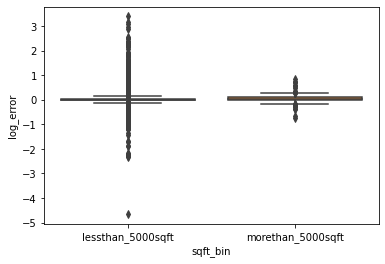

In [25]:
# box plot of the two groups and spending score
sns.boxplot(x=train.sqft_bin, y=train.log_error)
plt.show()

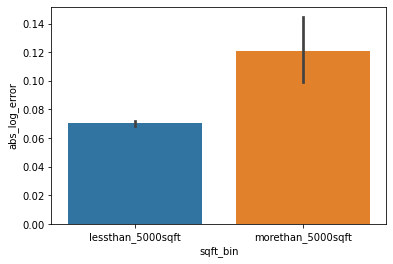

In [26]:
sns.barplot(x= train.sqft_bin, y= train.abs_log_error);

Homes with less than 5000 sqft seem to have more log error.

In [27]:
train.sqft_bin.value_counts()

lessthan_5000sqft    27989
morethan_5000sqft      174
Name: sqft_bin, dtype: int64

In [28]:
stat, p_value = stats.levene(train[train.sqft_bin=='lessthan_5000sqft'].log_error, 
                             train[train.sqft_bin=='morethan_5000sqft'].log_error,)
stat, p_value

(11.262833308212135, 0.000791789263999011)

$H_0$: Log_error of properties with less than 5000sqft >= Log_error mean of properties with more than 5000sqft

$H_a$: Log_error of properties with less than 5000sqft < Log_error mean of properties with more than 5000sqft

# should the test be run against log_erro or absolute log error?

In [29]:
sample_less = train[train.sqft_bin=='lessthan_5000sqft']
sample_more = train[train.sqft_bin=='morethan_5000sqft']

alpha = 0.05
t, p = stats.ttest_ind(sample_less.abs_log_error,sample_more.abs_log_error,equal_var = True, random_state=123)

print(t, p/2)

-4.211079775459738 1.2747093123817594e-05


**Since p/2 is less than 0.05 then we reject null hypothesis. So there is evidence to suggest that the log_error of properties with less than 5000 sqft is more than the log_error than propeties with more than 5000sqft.**

##################################redudant#######################################

# Custering using price and size

### scale 1st

In [30]:
train_scaled

parcelid  bedrooms  bathrooms  calculatedbathnbr  fullbathcnt  \
11303  14498262  0.428571   0.214286                2.5          2.0   
26458  12851739  0.285714   0.142857                2.0          2.0   
28486  11276661  0.428571   0.142857                2.0          2.0   
29814  10902464  0.285714   0.142857                2.0          2.0   
4406   10890115  0.285714   0.142857                2.0          2.0   
...         ...       ...        ...                ...          ...   
16553  11445017  0.285714   0.142857                2.0          2.0   
18488  13891248  0.714286   0.285714                3.0          3.0   
17080  11292243  0.428571   0.142857                2.0          2.0   
14801  17172485  0.142857   0.000000                1.0          1.0   
40175  12334791  0.428571   0.142857                2.0          2.0   

            age  yearbuilt  has_basement  has_deck  has_fireplace  ...  \
11303  0.191176   0.808824             0         0              0  ...   
26458  0.397059   0.602941             0         0              0  ...   
28486  0.169118   0.830882             0         0              0  ...   
29814  0.477941   0.522059             0         0              0  ...   
4406   0.551471   0.448529             0         0              0  ...   
...         ...        ...           ...       ...            ...  ...   
16553  0.448529   0.551471             0         0              0  ...   
18488  0.448529   0.551471             0         0              0  ...   
17080  0.455882   0.544118             0         0              0  ...   
14801  0.470588   0.529412             0         0              1  ...   
40175  0.492647   0.507353             0         0              0  ...   

       cluster_price_size  cluster_price_size_0  cluster_price_size_1  \
11303                   0                     1                     0   
26458                   3                     0                     0   
28486                   3                     0                     0   
29814                   3                     0                     0   
4406                    3                     0                     0   
...                   ...                   ...                   ...   
16553                   0                     1                     0   
18488                   1                     0                     1   
17080                   3                     0                     0   
14801                   3                     0                     0   
40175                   3                     0                     0   

       cluster_price_size_2  cluster_price_size_3  cluster_delinquency_value  \
11303                     0                     0                          2   
26458                     0                     1                          0   
28486                     0                     1                          0   
29814                     0                     1                          0   
4406                      0                     1                          0   
...                     ...                   ...                        ...   
16553                     0                     0                          0   
18488                     0                     0                          2   
17080                     0                     1                          0   
14801                     0                     1                          2   
40175                     0                     1                          0   

      cluster_delinquency_value_0 cluster_delinquency_value_1  \
11303                           0                           0   
26458                           1                           0   
28486                           1                           0   
29814                           1                           0   
4406                            1                           0   
...                      

# Taxamount _____what i am clustering on price and size

In [48]:
# list of variables I will cluster on. 
cluster_vars = ['taxamount', 'sqft', 'bathroms']
cluster_name = 'price_and_size_cluster'


In [49]:
X_price_and_size_cluster = train_scaled[['taxamount', 'sqft', 'lot_sqft']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_price_and_size_cluster)
train_scaled['cluster'] = kmeans.predict(X_price_and_size_cluster)
train['cluster']=kmeans.predict(X_price_and_size_cluster)
centroids= pd.DataFrame(kmeans.cluster_centers_, columns=X_price_and_size_cluster.columns)

centroids

taxamount      sqft  lot_sqft
0   0.255831  0.449924  0.003268
1   0.087449  0.182056  0.001414
2   0.053920  0.097780  0.001164
3   0.153270  0.287533  0.001846

In [50]:
train_scaled.cluster

11303    1
26458    2
28486    2
29814    2
4406     2
        ..
16553    1
18488    3
17080    2
14801    2
40175    2
Name: cluster, Length: 28163, dtype: int32

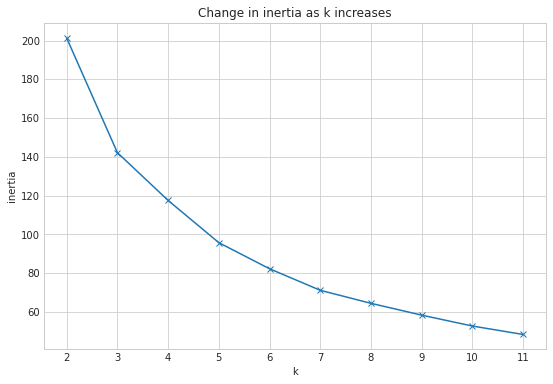

In [51]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_price_and_size_cluster).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

k of interest 3, 4, and 5

Text(0.5, 1.0, 'Visualizing Cluster Centers')

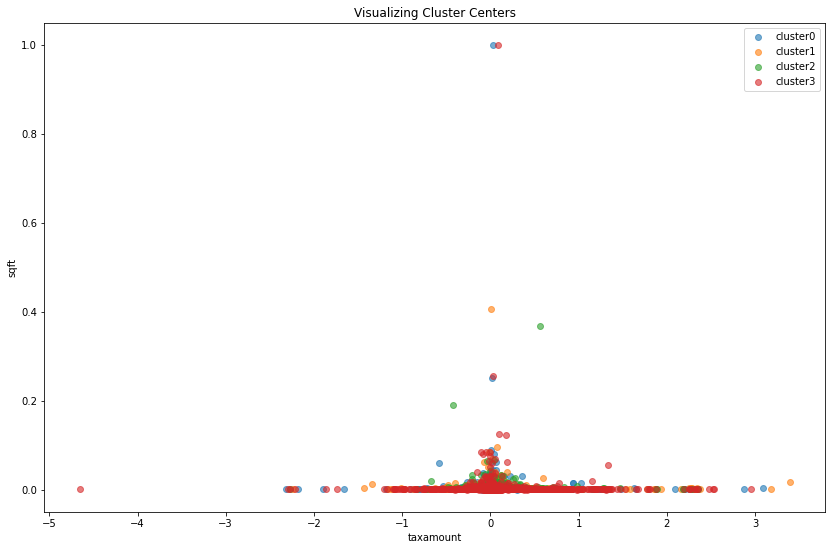

In [35]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_scaled.groupby('cluster'):
    plt.scatter(subset.log_error, subset.lot_sqft, label='cluster' + str(cluster), alpha=.6)

#centroids.plot.scatter(x='taxamount', y='lot_sqft', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('taxamount')
plt.ylabel('sqft')
plt.title('Visualizing Cluster Centers')

In [36]:
train_scaled.log_error

11303    0.014676
26458   -0.025476
28486   -0.084878
29814   -0.104920
4406    -0.096200
           ...   
16553    0.017411
18488    0.138144
17080   -0.083443
14801   -0.167455
40175    0.043003
Name: log_error, Length: 28163, dtype: float64

Text(0.5, 1.0, 'Visualizing Cluster Centers')

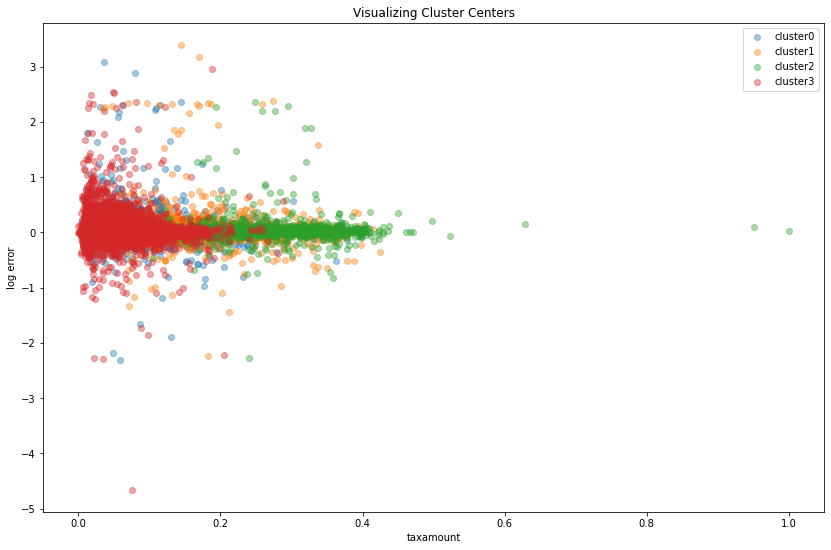

In [37]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_scaled.groupby('cluster'):
    plt.scatter(x=subset.taxamount, y=subset.log_error, label='cluster' + str(cluster), alpha=.4)

#centroids.plot.scatter(x='taxamount', y='log_error', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('taxamount')
plt.ylabel('log error')
plt.title('Visualizing Cluster Centers')

In [38]:
train_scaled.cluster.value_counts()


3    12520
0     9447
1     4779
2     1417
Name: cluster, dtype: int64

# question? Is there a Relationship between green cluster and log error

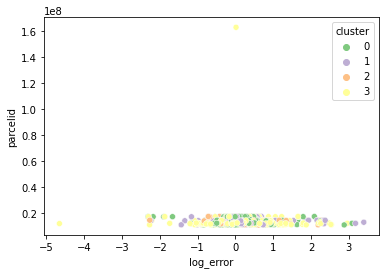

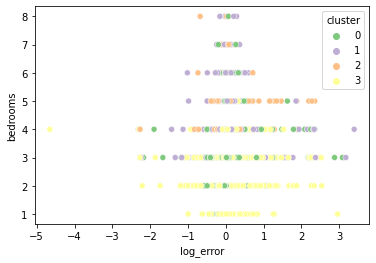

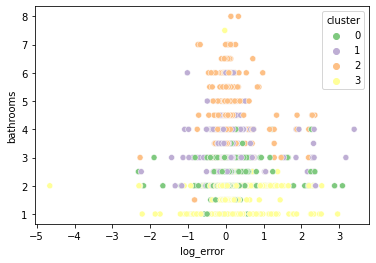

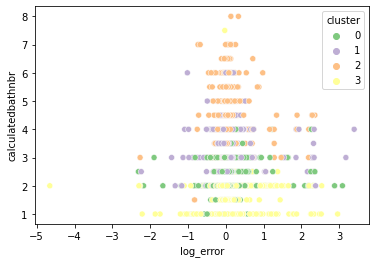

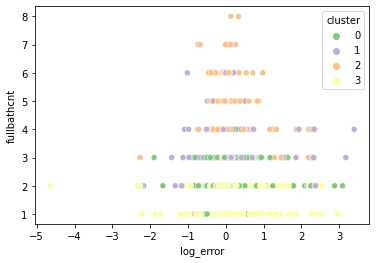

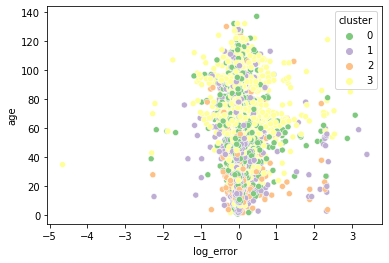

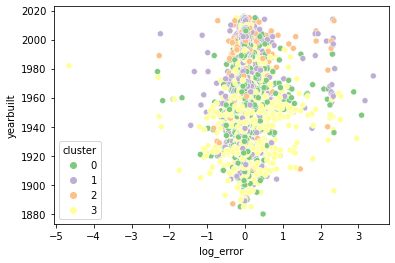

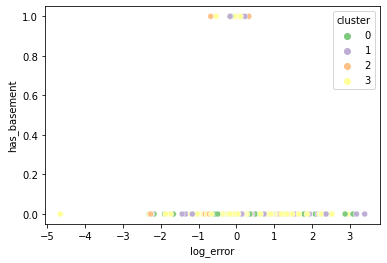

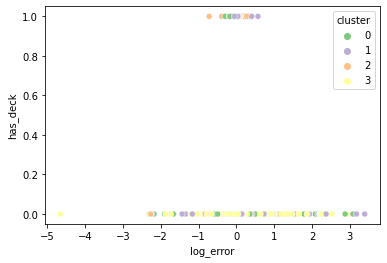

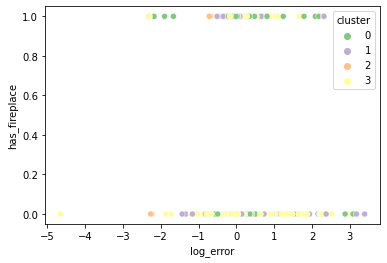

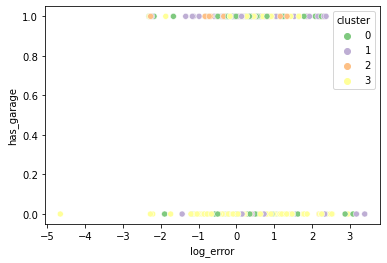

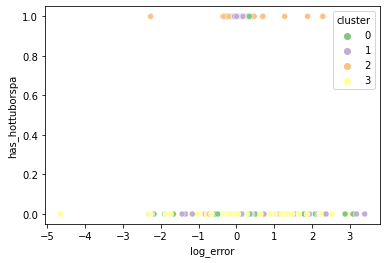

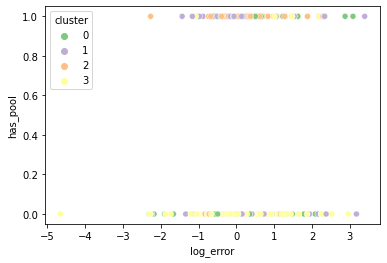

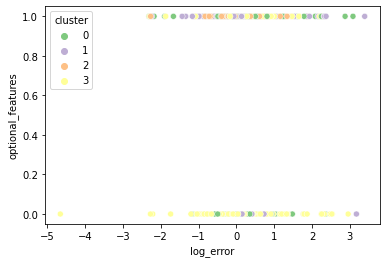

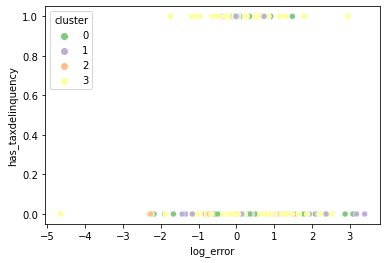

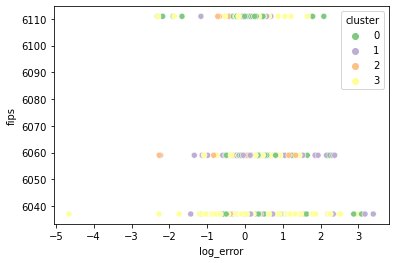

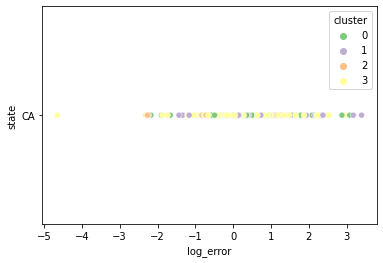

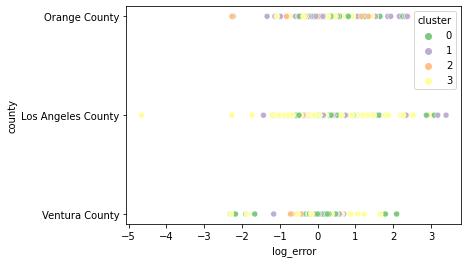

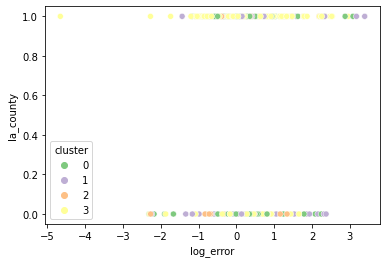

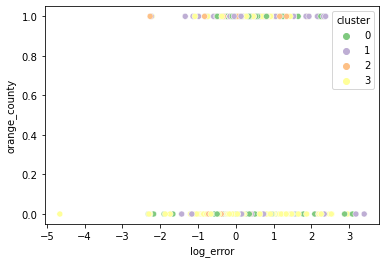

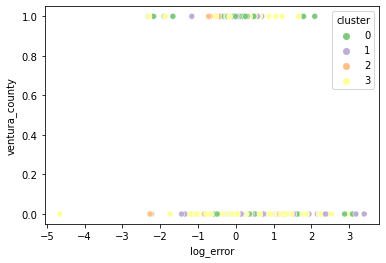

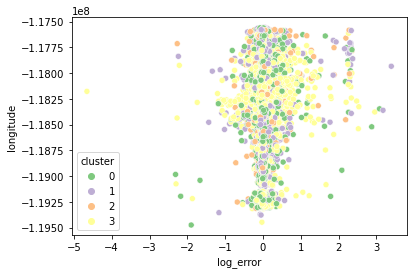

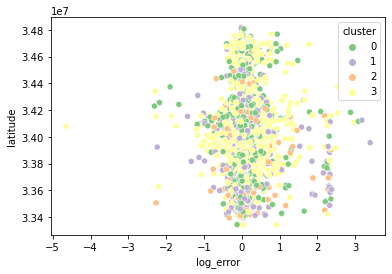

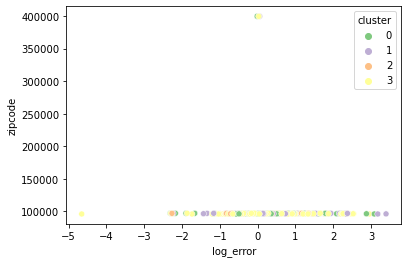

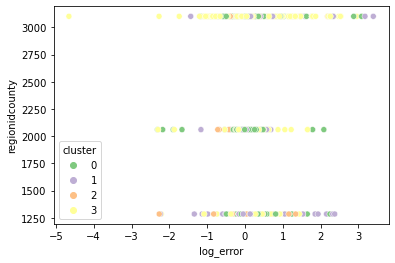

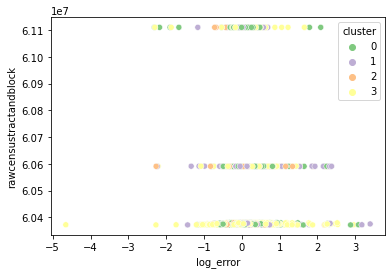

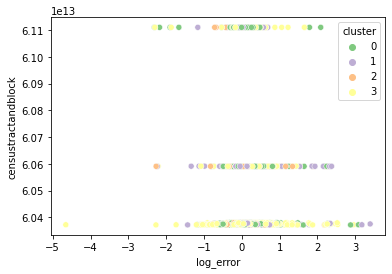

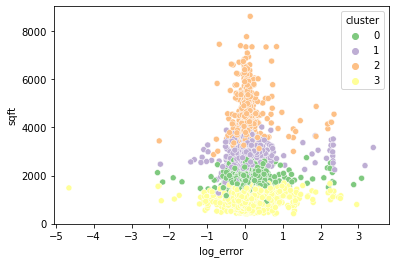

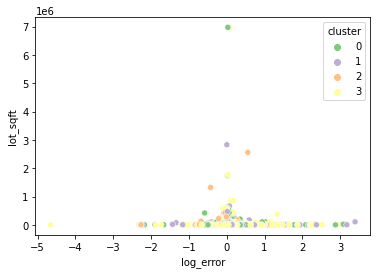

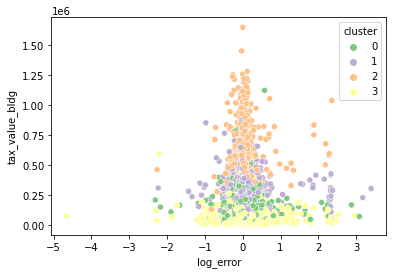

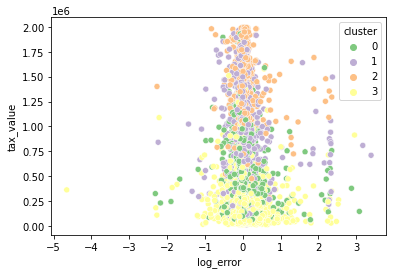

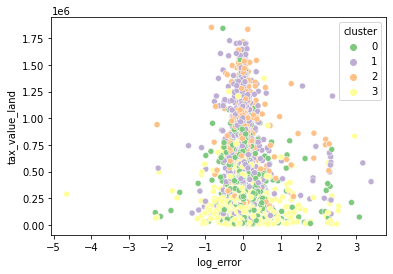

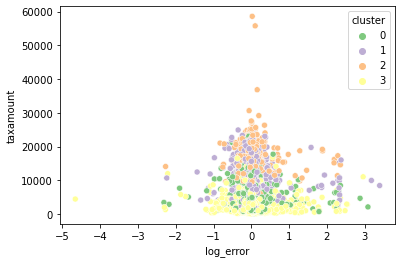

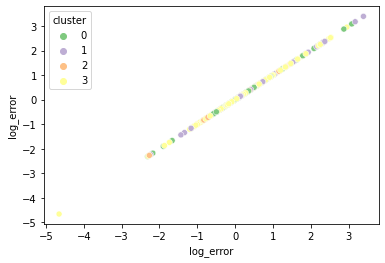

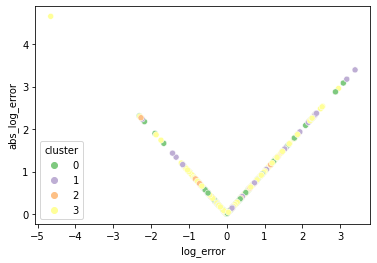

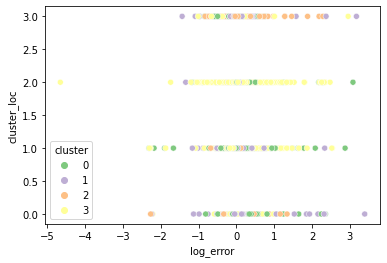

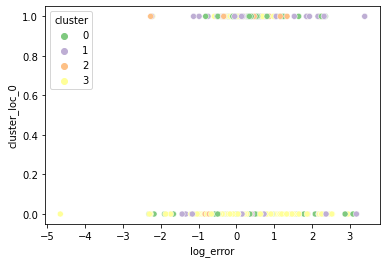

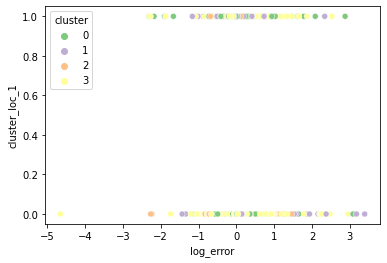

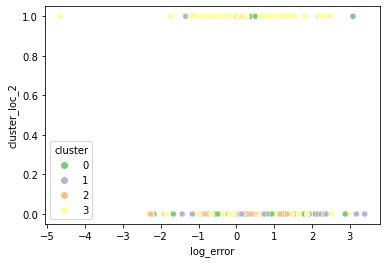

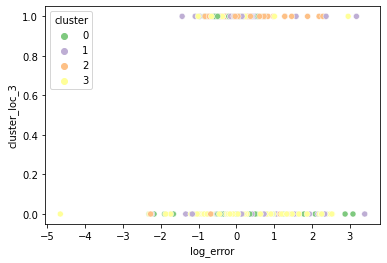

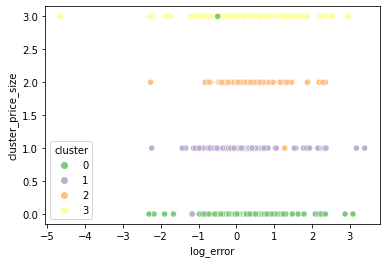

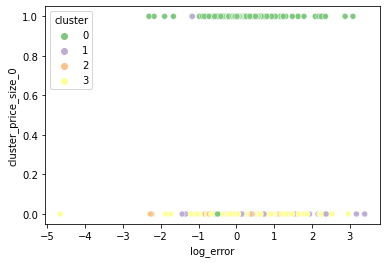

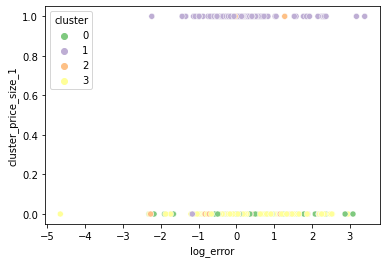

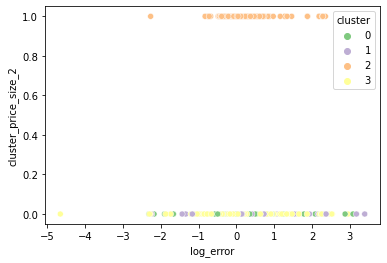

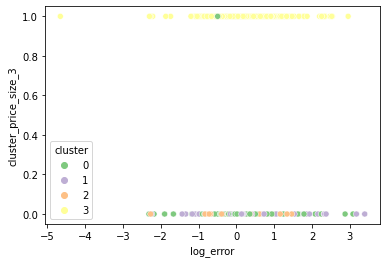

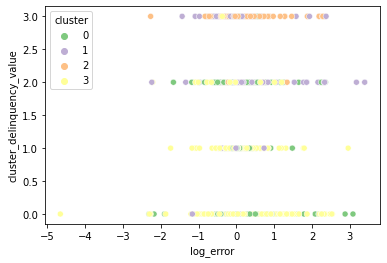

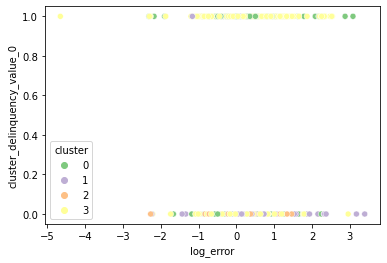

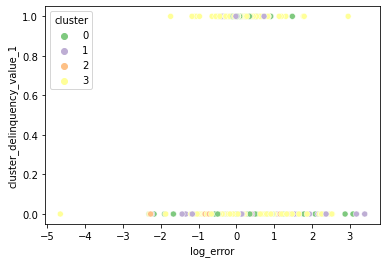

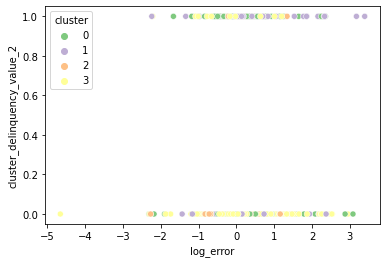

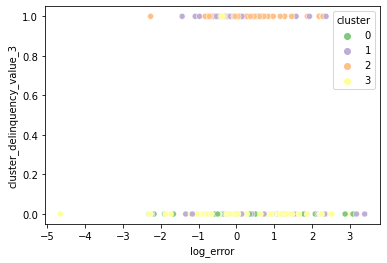

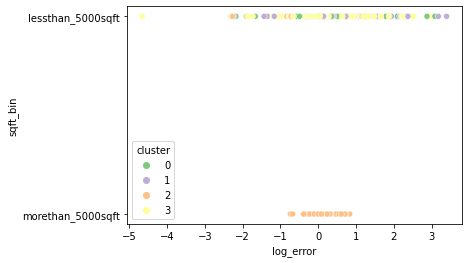

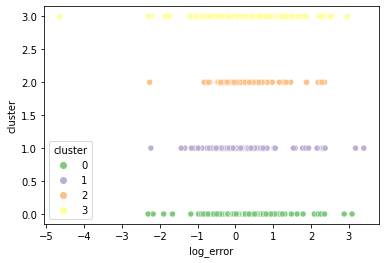

In [39]:
for i in train.columns.to_list():    
    sns.scatterplot(x=train.log_error, y=train[i],hue=train.cluster,palette='Accent')
    plt.show()

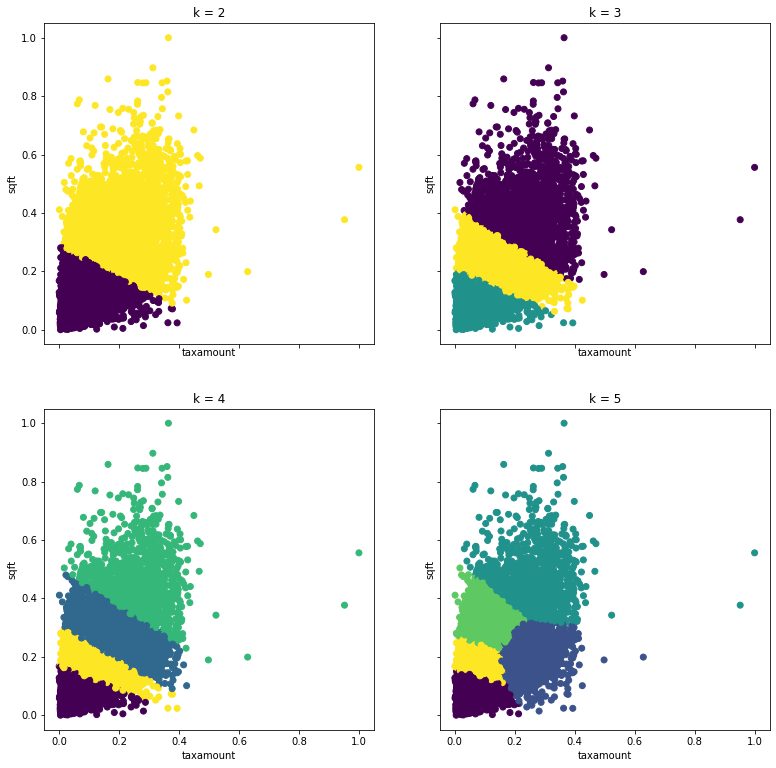

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_price_and_size_cluster).predict(X_price_and_size_cluster)
    ax.scatter(X_price_and_size_cluster.taxamount, X_price_and_size_cluster.sqft, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='taxamount', ylabel='sqft')

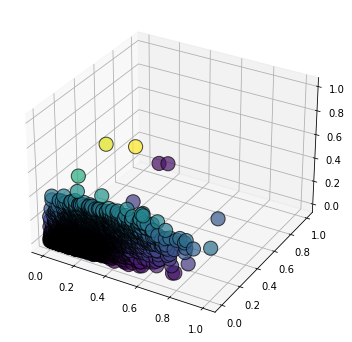

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = X_price_and_size_cluster.sqft
y = X_price_and_size_cluster.lot_sqft
z = X_price_and_size_cluster.taxamount


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

In [42]:
train.tax_value

11303    562351.0
26458    236264.0
28486    202328.0
29814    106819.0
4406     249892.0
           ...   
16553    383482.0
18488    663340.0
17080     95700.0
14801    895219.0
40175    222462.0
Name: tax_value, Length: 28163, dtype: float64

# Tax_value ______what i am clustering on price and size

In [43]:
train.columns

Index(['parcelid', 'bedrooms', 'bathrooms', 'calculatedbathnbr', 'fullbathcnt',
       'age', 'yearbuilt', 'has_basement', 'has_deck', 'has_fireplace',
       'has_garage', 'has_hottuborspa', 'has_pool', 'optional_features',
       'has_taxdelinquency', 'fips', 'state', 'county', 'la_county',
       'orange_county', 'ventura_county', 'longitude', 'latitude', 'zipcode',
       'regionidcounty', 'rawcensustractandblock', 'censustractandblock',
       'sqft', 'lot_sqft', 'tax_value_bldg', 'tax_value', 'tax_value_land',
       'taxamount', 'log_error', 'abs_log_error', 'cluster_loc',
       'cluster_loc_0', 'cluster_loc_1', 'cluster_loc_2', 'cluster_loc_3',
       'cluster_price_size', 'cluster_price_size_0', 'cluster_price_size_1',
       'cluster_price_size_2', 'cluster_price_size_3',
       'cluster_delinquency_value', 'cluster_delinquency_value_0',
       'cluster_delinquency_value_1', 'cluster_delinquency_value_2',
       'cluster_delinquency_value_3', 'sqft_bin', 'cluster'],
      dt

In [44]:
# list of variables I will cluster on. 
cluster_vars2 = ['tax_value', 'sqft', 'lot_sqft','has_taxdelinquency']
cluster_name = 'price_and_size_cluster'


In [45]:
X_tax_value = train_scaled[['tax_value', 'sqft', 'lot_sqft','has_taxdelinquency']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_tax_value)
train_scaled['cluster2'] = kmeans.predict(X_tax_value)
train['cluster2'] = kmeans.predict(X_tax_value)
centroids2= pd.DataFrame(kmeans.cluster_centers_, columns=X_tax_value.columns)

centroids2

tax_value      sqft  lot_sqft  has_taxdelinquency
0   0.182419  0.147437  0.001461        1.000000e+00
1   0.107778  0.129469  0.001343        1.672273e-15
2   0.301611  0.214208  0.001432        3.191891e-16
3   0.641979  0.348292  0.002414        6.938894e-18

In [46]:
train_scaled.cluster2

11303    2
26458    1
28486    1
29814    1
4406     1
        ..
16553    1
18488    2
17080    1
14801    2
40175    1
Name: cluster2, Length: 28163, dtype: int32

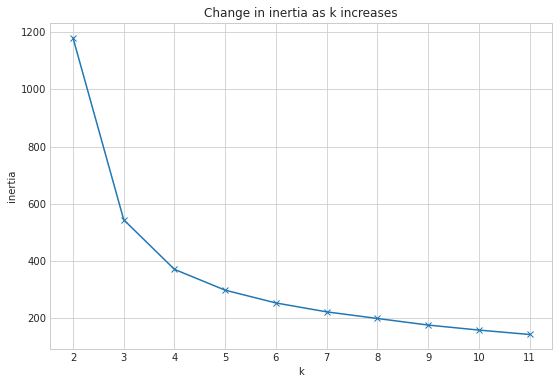

In [52]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_scaled[['tax_value', 'sqft', 'lot_sqft','has_taxdelinquency']]).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

k of interest 3, 4, and 5

Text(0.5, 1.0, 'Visualizing Cluster Centers')

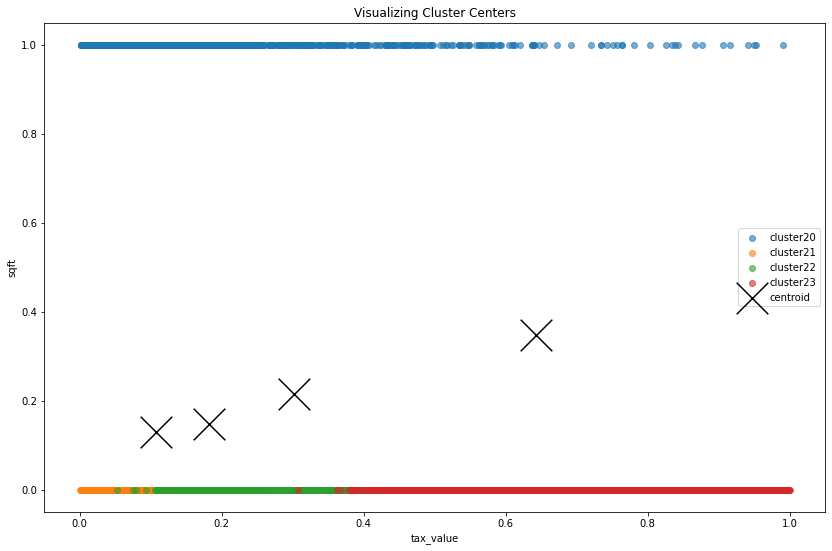

In [53]:
plt.figure(figsize=(14, 9))

for cluster2, subset in train_scaled.groupby('cluster2'):
    plt.scatter(subset.tax_value, subset.has_taxdelinquency, label='cluster2' + str(cluster2), alpha=.6)

centroids2.plot.scatter(x='tax_value', y='sqft', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('tax_value')
plt.ylabel('sqft')
plt.title('Visualizing Cluster Centers')

<AxesSubplot:xlabel='log_error', ylabel='Count'>

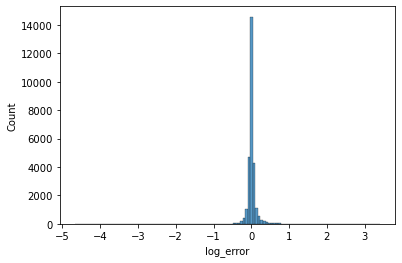

In [54]:
sns.histplot(train.log_error,bins=120)

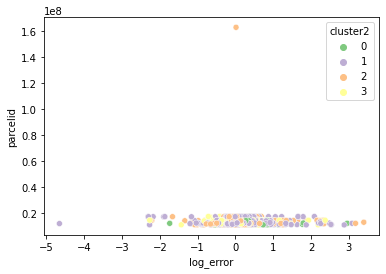

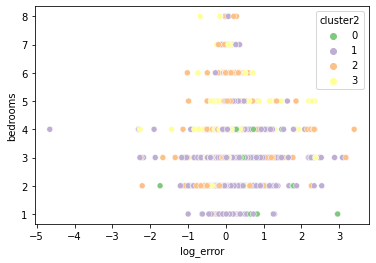

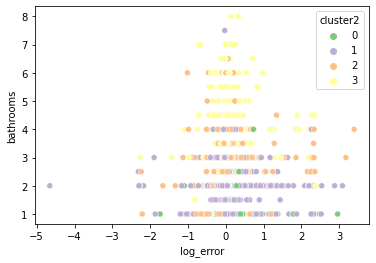

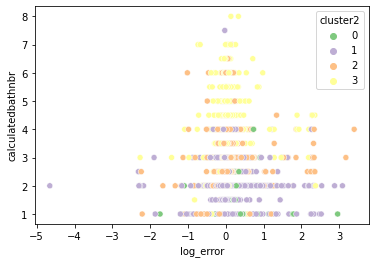

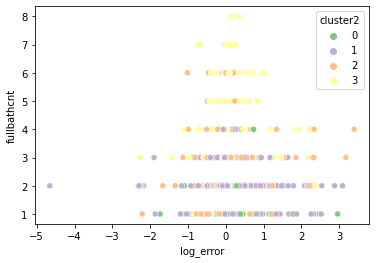

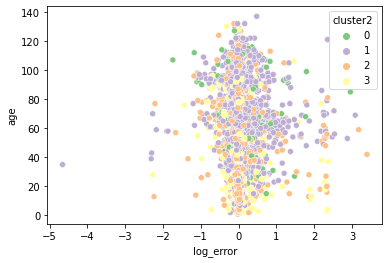

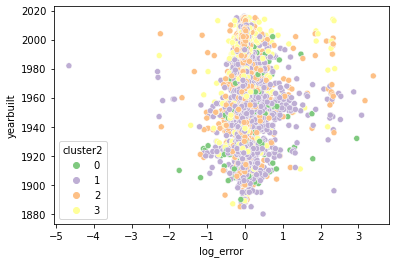

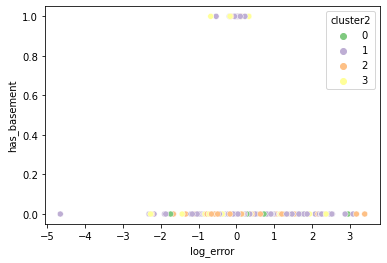

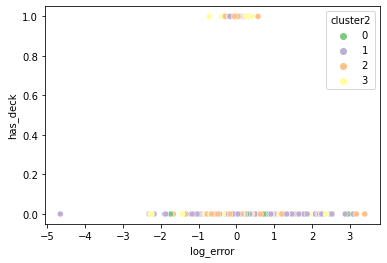

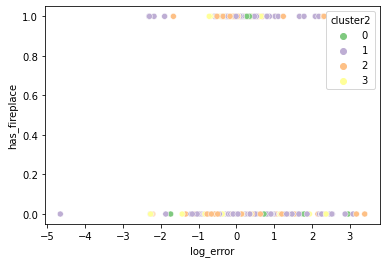

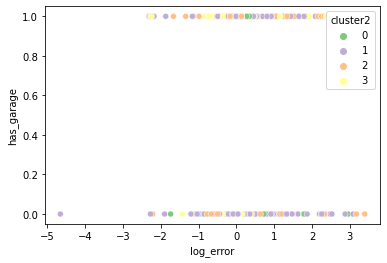

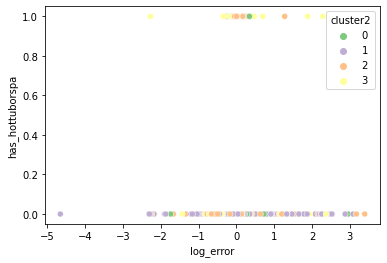

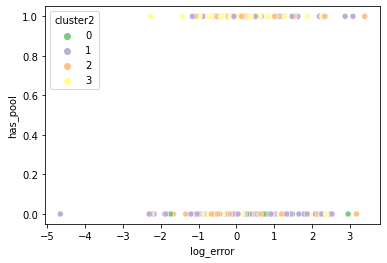

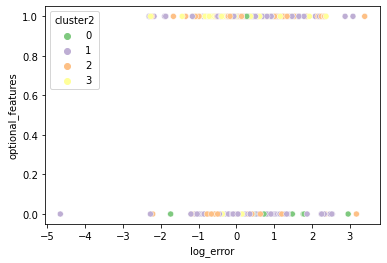

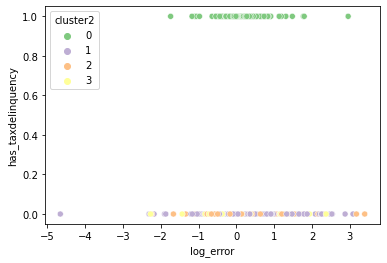

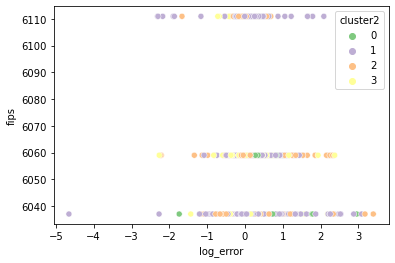

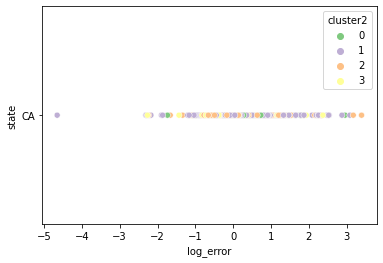

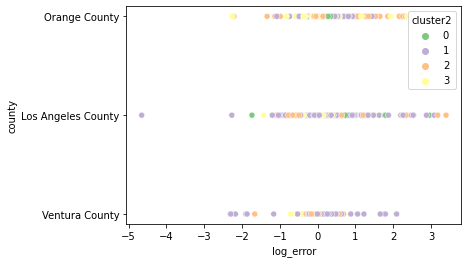

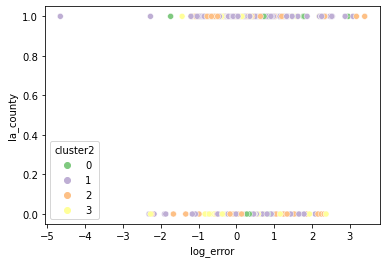

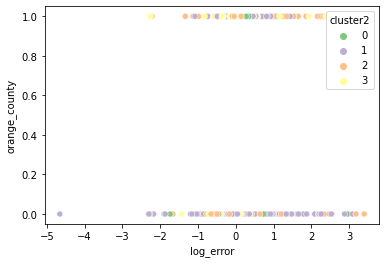

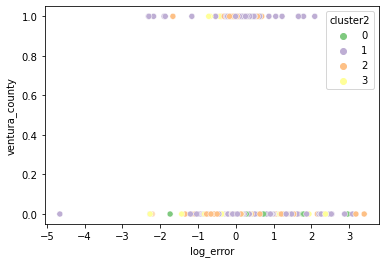

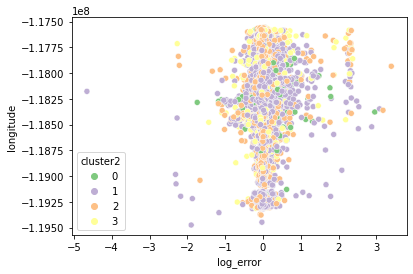

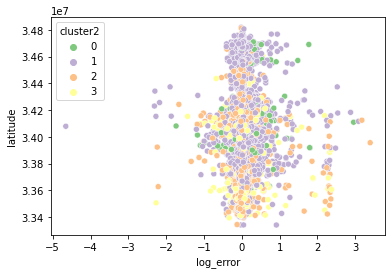

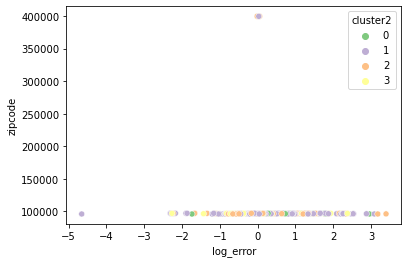

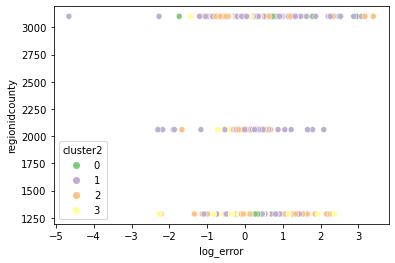

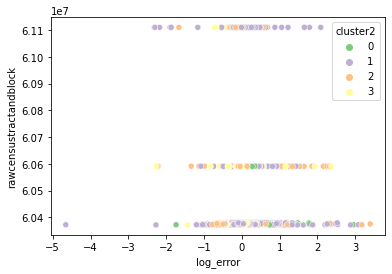

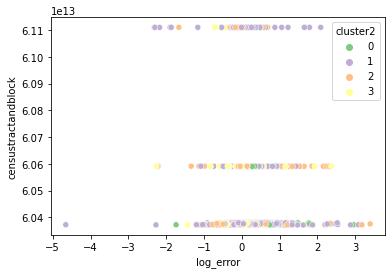

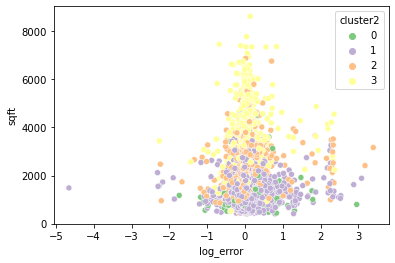

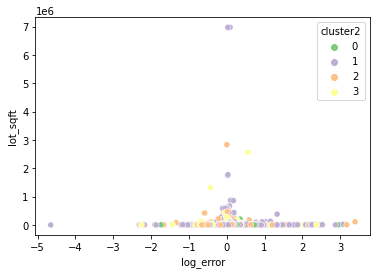

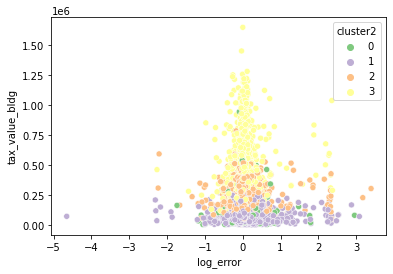

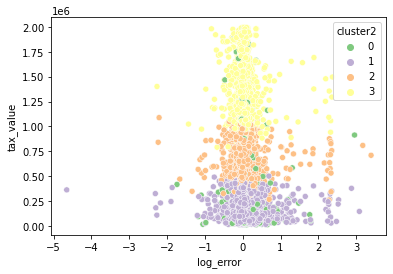

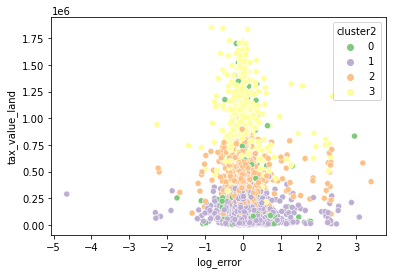

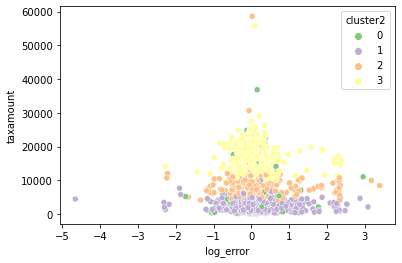

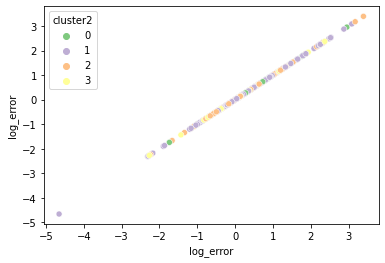

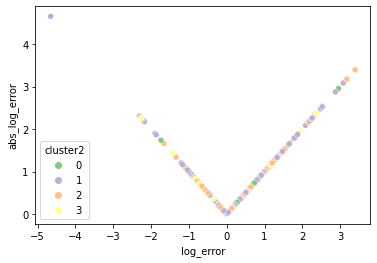

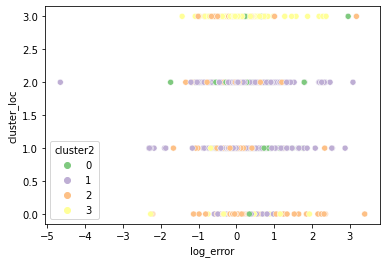

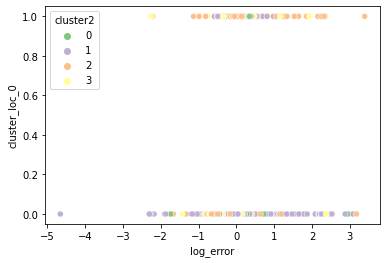

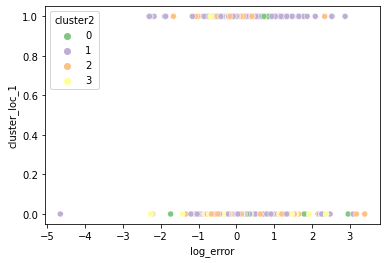

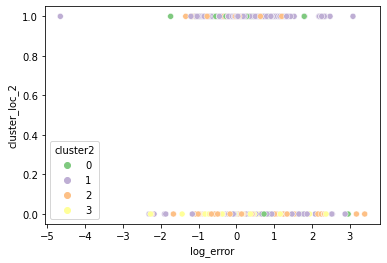

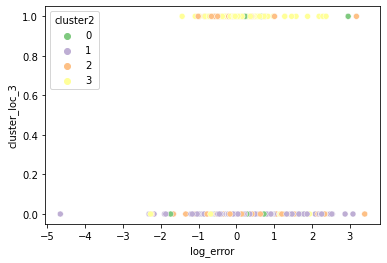

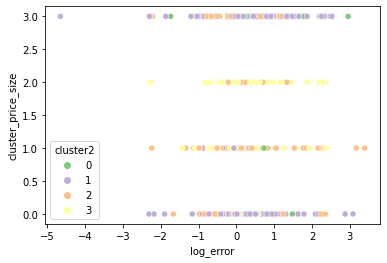

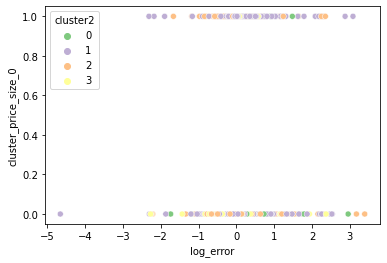

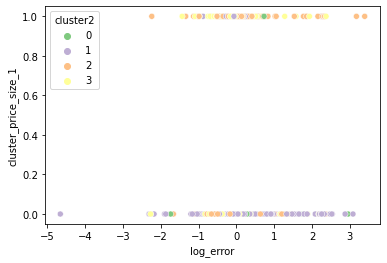

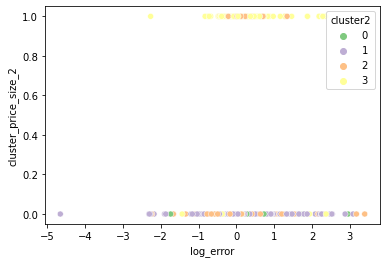

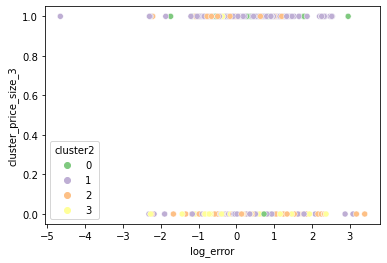

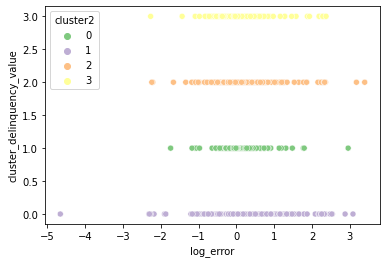

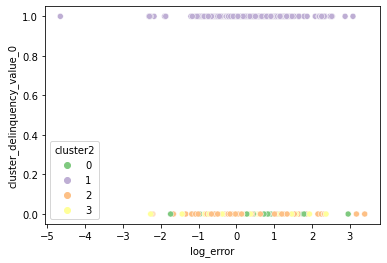

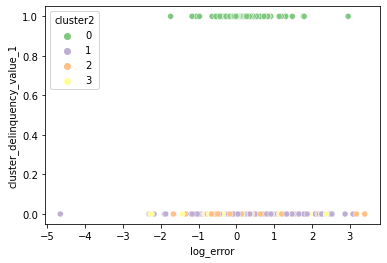

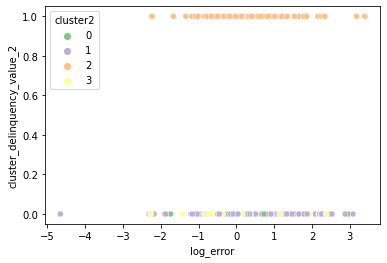

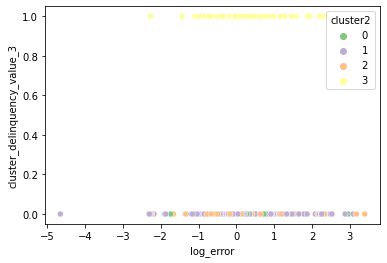

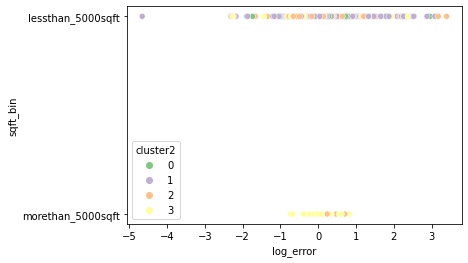

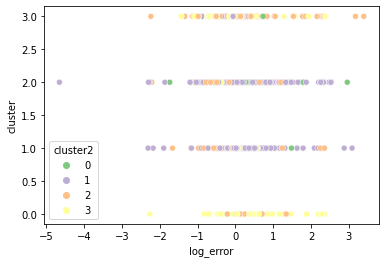

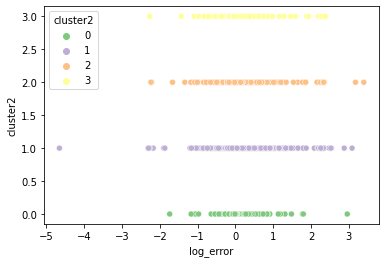

In [55]:
for i in train.columns.to_list():    
    sns.scatterplot(x=train.log_error, y=train[i],hue=train.cluster2,palette='Accent')
    plt.show()

<AxesSubplot:xlabel='log_error', ylabel='sqft'>

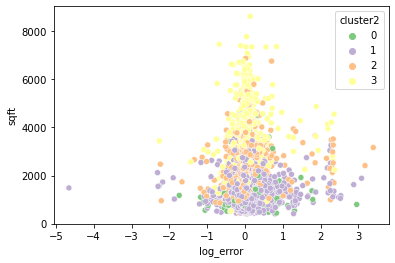

In [56]:
sns.scatterplot(x=train.log_error, y=train.sqft,hue=train.cluster2,palette='Accent')

In [57]:
train_scaled.cluster.value_counts()


2    12554
1     9445
3     4767
0     1397
Name: cluster, dtype: int64

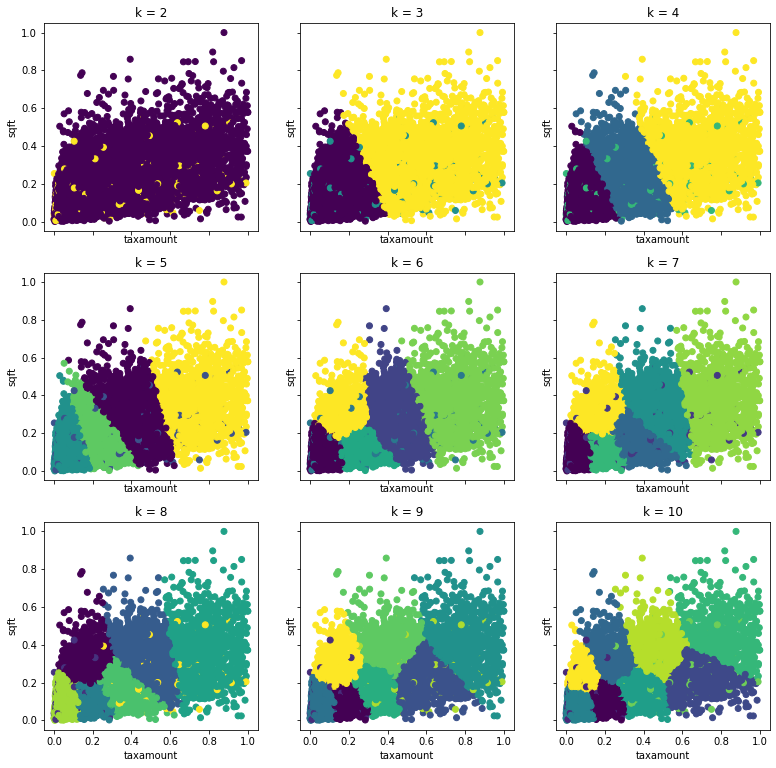

In [58]:
fig, axs = plt.subplots(3, 3, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 12)):
    clusters = KMeans(k).fit(train_scaled[['tax_value', 'sqft', 'lot_sqft','has_taxdelinquency']]).predict(train_scaled[['tax_value', 'sqft', 'lot_sqft','has_taxdelinquency']])
    ax.scatter(train_scaled['tax_value'], train_scaled['sqft'], c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='taxamount', ylabel='sqft')

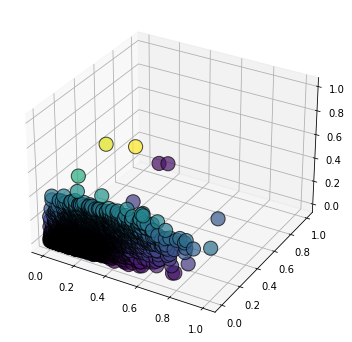

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = X_price_and_size_cluster.sqft
y = X_price_and_size_cluster.lot_sqft
z = X_price_and_size_cluster.taxamount


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

#######################*********************************END Redundant ************************************###########################

# Question 2: Is there more log_error in Older homes?


In [60]:
train.yearbuilt.describe()

count    28163.000000
mean      1962.932926
std         22.708665
min       1880.000000
25%       1950.000000
50%       1960.000000
75%       1978.000000
max       2016.000000
Name: yearbuilt, dtype: float64

<AxesSubplot:xlabel='yearbuilt', ylabel='Count'>

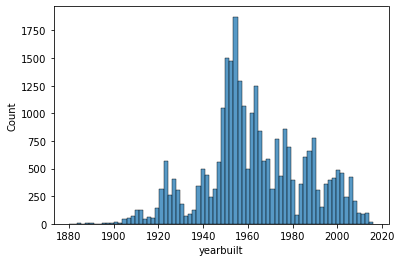

In [61]:
sns.histplot(train.yearbuilt)

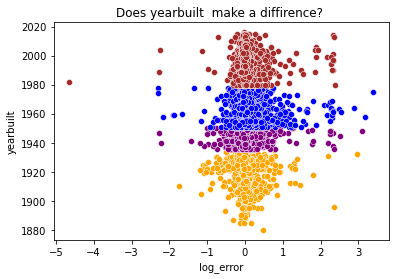

In [62]:
sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[train.yearbuilt<= 1935], color='orange')

sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[(train.yearbuilt> 1935) & (train.yearbuilt<=1950)], 
                color='purple')
sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[(train.yearbuilt> 1950) & (train.yearbuilt<1979)], 
                color='blue')
sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[train.yearbuilt>1979], 
                color='brown')

plt.title("Does yearbuilt  make a diffirence? ")
plt.show()

**Yearbuilt does not seem to be an indicator of log_error with current bins. There is error in all ages more so in the years 1940 and above. Maybe if bins where distributed diffirently could lead to new discovery**

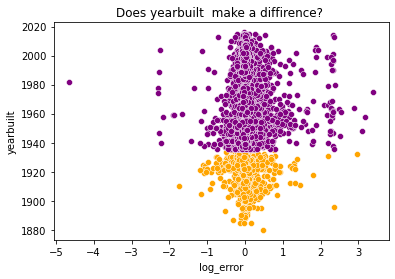

In [63]:
sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[train.yearbuilt<= 1935], color='orange')

sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[train.yearbuilt> 1935], 
                color='purple')


plt.title("Does yearbuilt  make a diffirence? ")
plt.show()

In [64]:
train['yearbuilt_bins'] = pd.cut(train.yearbuilt, [0,1935,2020],labels = ['homes_lessthan_1935', 'homes_morethan_1935'])


In [65]:
train.yearbuilt_bins.value_counts()

homes_morethan_1935    25200
homes_lessthan_1935     2963
Name: yearbuilt_bins, dtype: int64

<AxesSubplot:xlabel='log_error', ylabel='yearbuilt'>

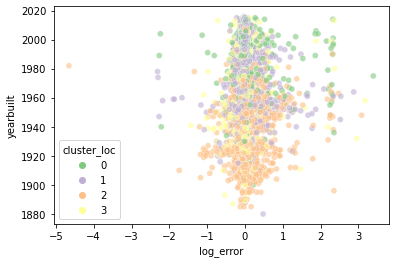

In [66]:
sns.scatterplot(data= train, x='log_error', y='yearbuilt', hue=train.cluster_loc, palette='Accent',alpha=.6)

In [67]:
train.columns

Index(['parcelid', 'bedrooms', 'bathrooms', 'calculatedbathnbr', 'fullbathcnt',
       'age', 'yearbuilt', 'has_basement', 'has_deck', 'has_fireplace',
       'has_garage', 'has_hottuborspa', 'has_pool', 'optional_features',
       'has_taxdelinquency', 'fips', 'state', 'county', 'la_county',
       'orange_county', 'ventura_county', 'longitude', 'latitude', 'zipcode',
       'regionidcounty', 'rawcensustractandblock', 'censustractandblock',
       'sqft', 'lot_sqft', 'tax_value_bldg', 'tax_value', 'tax_value_land',
       'taxamount', 'log_error', 'abs_log_error', 'cluster_loc',
       'cluster_loc_0', 'cluster_loc_1', 'cluster_loc_2', 'cluster_loc_3',
       'cluster_price_size', 'cluster_price_size_0', 'cluster_price_size_1',
       'cluster_price_size_2', 'cluster_price_size_3',
       'cluster_delinquency_value', 'cluster_delinquency_value_0',
       'cluster_delinquency_value_1', 'cluster_delinquency_value_2',
       'cluster_delinquency_value_3', 'sqft_bin', 'cluster', 'cluster2

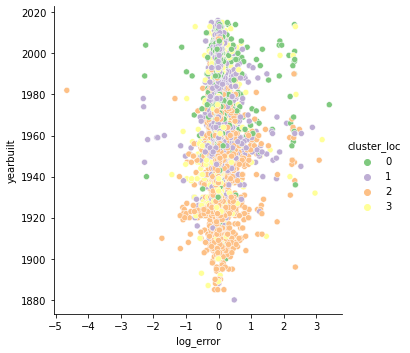

In [68]:
sns.relplot(data= train, x='log_error', y='yearbuilt', hue=train.cluster_loc, palette='Accent')

### there seems to be more error in cluster 1

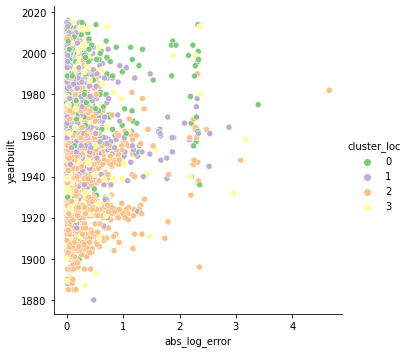

In [69]:
sns.relplot(data= train, x='abs_log_error', y='yearbuilt', hue=train.cluster_loc, palette='Accent')

In [70]:
stat, p_value = stats.levene(train[train.yearbuilt_bins=='homes_morethan_1935'].log_error, 
                             train[train.yearbuilt_bins=='homes_lessthan_1935'].log_error)
stat, p_value

(162.5315942734983, 4.011025182355408e-37)

$H_0$: Log_error of properties whose yearbuilt is less or equal than 1935 >= Log_error mean of properties whose yearbuilt is more than 1935

$H_a$: Log_error of properties whose yearbuilt is less or equal than 1935 < Log_error mean of properties whose yearbuilt is more than 1935

In [71]:
sample_more = train[train.yearbuilt_bins=='homes_morethan_1935']
sample_less= train[train.yearbuilt_bins=='homes_lessthan_1935']

alpha = 0.05
t, p = stats.ttest_ind(sample_less.log_error,sample_more.log_error,equal_var = True, random_state=123)

print(t, p/2)

-2.842733581073103 0.0022380303836164175


We reject the null hypotheis. There is evidence to suggest that the mean log error of properties whose yearbuilt is below 1935 is mless than log error of homes built after 1935

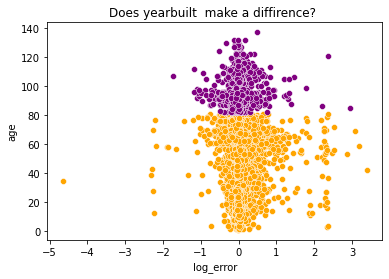

In [72]:
sns.scatterplot(y='age', x='log_error',
                data=train[train.age<= 81], color='orange')

sns.scatterplot(y='age', x='log_error',
               data=train[train.age> 81], 
               color='purple')


plt.title("Does yearbuilt  make a diffirence? ")
plt.show()

In [73]:
train.age.describe()

count    28163.000000
mean        54.067074
std         22.708665
min          1.000000
25%         39.000000
50%         57.000000
75%         67.000000
max        137.000000
Name: age, dtype: float64

In [74]:
train['age_bins'] = pd.cut(train.age, [0,81,150],labels = ['homes_lessthan_81', 'homes_morethan_81'])


In [75]:
train.age_bins.value_counts()

homes_lessthan_81    25200
homes_morethan_81     2963
Name: age_bins, dtype: int64

In [76]:
stat, p_value = stats.levene(train[train.age_bins=='homes_morethan_81'].log_error, 
                             train[train.age_bins=='homes_lessthan_81'].log_error)
stat, p_value

(162.5315942734983, 4.011025182355408e-37)

In [77]:
sample_more = train[train.age_bins=='homes_morethan_81']
sample_less= train[train.age_bins=='homes_lessthan_81']

alpha = 0.05
t, p = stats.ttest_ind(sample_less.log_error,sample_more.log_error,equal_var = True, random_state=123)

print(t, p/2)

2.842733581073103 0.0022380303836164175


In [78]:
train.fips

11303    6059.0
26458    6037.0
28486    6037.0
29814    6037.0
4406     6037.0
          ...  
16553    6037.0
18488    6059.0
17080    6037.0
14801    6111.0
40175    6037.0
Name: fips, Length: 28163, dtype: float64

# Question 3 longitute vs latitude log error

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

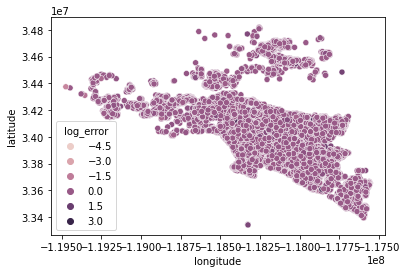

In [79]:
sns.scatterplot(x=train.longitude, y=train.latitude,hue=train.log_error)

# question? Is there a Relationship between green cluster and log error

<AxesSubplot:xlabel='cluster_price_size', ylabel='Count'>

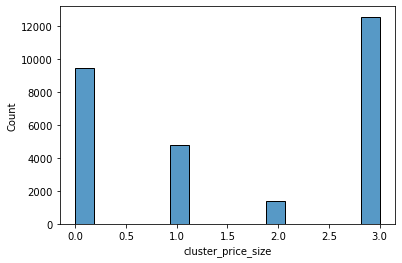

In [80]:
sns.histplot(train.cluster_price_size)

'taxamount', 'sqft', 'lot_sqft features in cluster of interest

<AxesSubplot:xlabel='log_error', ylabel='sqft'>

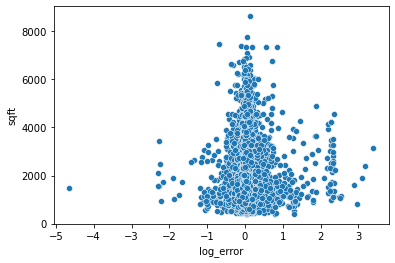

In [81]:
sns.scatterplot(x=train.log_error, y=train.sqft)

Text(0.5, 1.0, 'Visualizing Cluster Centers')

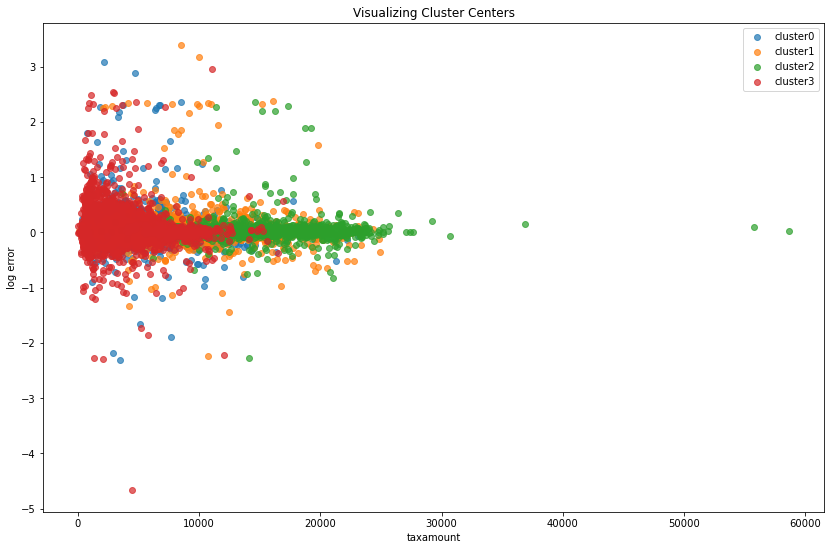

In [82]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster_price_size'):
    plt.scatter(x=subset.taxamount, y=subset.log_error, label='cluster' + str(cluster), alpha=.7, )
plt.legend()
plt.xlabel('taxamount')
plt.ylabel('log error')
plt.title('Visualizing Cluster Centers')

Text(0.5, 1.0, 'Visualizing Cluster Centers')

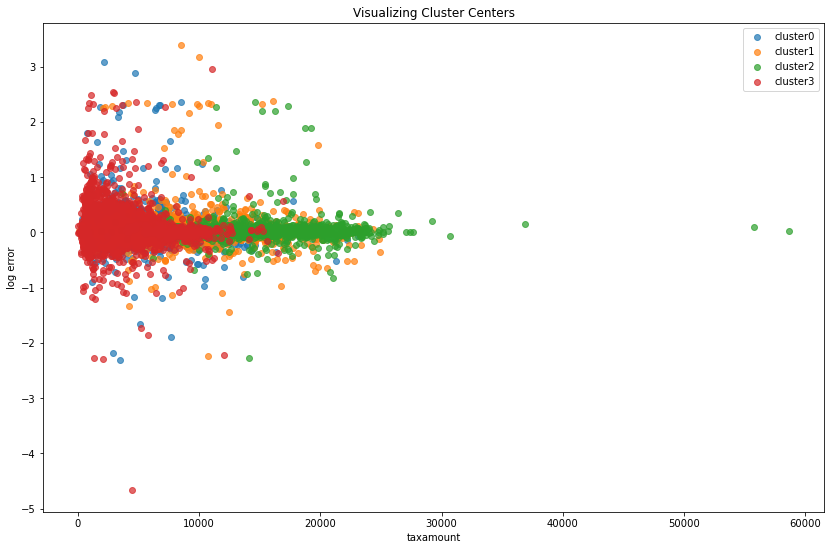

In [83]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster_price_size'):
    plt.scatter(x=subset.taxamount, y=subset.log_error, label='cluster' + str(cluster), alpha=.7, )
plt.legend()
plt.xlabel('taxamount')
plt.ylabel('log error')
plt.title('Visualizing Cluster Centers')

In [84]:
def get_pearsonr(train,feature1, feature2):
    r, p = stats.pearsonr(train[feature1],train[feature2])
    print(f'correlation {r}')
    print(f'p-value {p}')
    print('____________________')

In [85]:
train.dtypes

parcelid                          int64
bedrooms                        float64
bathrooms                       float64
calculatedbathnbr               float64
fullbathcnt                     float64
age                             float64
yearbuilt                       float64
has_basement                      int64
has_deck                          int64
has_fireplace                     int64
has_garage                        int64
has_hottuborspa                 float64
has_pool                        float64
optional_features                 int64
has_taxdelinquency                int64
fips                            float64
state                            object
county                           object
la_county                         uint8
orange_county                     uint8
ventura_county                    uint8
longitude                       float64
latitude                        float64
zipcode                         float64
regionidcounty                  float64


In [86]:
train.columns

Index(['parcelid', 'bedrooms', 'bathrooms', 'calculatedbathnbr', 'fullbathcnt',
       'age', 'yearbuilt', 'has_basement', 'has_deck', 'has_fireplace',
       'has_garage', 'has_hottuborspa', 'has_pool', 'optional_features',
       'has_taxdelinquency', 'fips', 'state', 'county', 'la_county',
       'orange_county', 'ventura_county', 'longitude', 'latitude', 'zipcode',
       'regionidcounty', 'rawcensustractandblock', 'censustractandblock',
       'sqft', 'lot_sqft', 'tax_value_bldg', 'tax_value', 'tax_value_land',
       'taxamount', 'log_error', 'abs_log_error', 'cluster_loc',
       'cluster_loc_0', 'cluster_loc_1', 'cluster_loc_2', 'cluster_loc_3',
       'cluster_price_size', 'cluster_price_size_0', 'cluster_price_size_1',
       'cluster_price_size_2', 'cluster_price_size_3',
       'cluster_delinquency_value', 'cluster_delinquency_value_0',
       'cluster_delinquency_value_1', 'cluster_delinquency_value_2',
       'cluster_delinquency_value_3', 'sqft_bin', 'cluster', 'cluster2

In [87]:
columns = ['bedrooms', 'bathrooms', 'calculatedbathnbr', 'fullbathcnt',
       'age', 'yearbuilt', 'has_basement', 'has_deck', 'has_fireplace',
       'has_garage', 'has_hottuborspa', 'has_pool', 'optional_features',
       'has_taxdelinquency', 'fips', 'la_county',
       'orange_county', 'ventura_county', 'longitude', 'latitude', 'zipcode',
       'regionidcounty', 'rawcensustractandblock', 'censustractandblock',
       'sqft', 'lot_sqft', 'tax_value_bldg', 'tax_value', 'tax_value_land',
       'taxamount', 'log_error', 'abs_log_error', 'cluster_loc',
       'cluster_loc_0', 'cluster_loc_1', 'cluster_loc_2', 'cluster_loc_3',
       'cluster_price_size', 'cluster_price_size_0', 'cluster_price_size_1',
       'cluster_price_size_2', 'cluster_price_size_3',
       'cluster_delinquency_value', 'cluster_delinquency_value_0',
       'cluster_delinquency_value_1', 'cluster_delinquency_value_2',
       'cluster_delinquency_value_3', 'cluster', 'cluster2',
       ]

In [88]:
for i in train[columns]:
        print (i)
        get_pearsonr(train, 'log_error', i )

bedrooms
correlation 0.0259626687060147
p-value 1.3152441242819406e-05
____________________
bathrooms
correlation 0.03005432200204639
p-value 4.545128420460148e-07
____________________
calculatedbathnbr
correlation 0.03005432200204639
p-value 4.545128420460148e-07
____________________
fullbathcnt
correlation 0.027788487276456823
p-value 3.099528085716929e-06
____________________
age
correlation -0.013696039289905579
p-value 0.02153604566889076
____________________
yearbuilt
correlation 0.013696039289905556
p-value 0.02153604566889076
____________________
has_basement
correlation -0.0065027944668660615
p-value 0.2751622921114593
____________________
has_deck
correlation -0.00281307998443379
p-value 0.636879370639814
____________________
has_fireplace
correlation -0.00966347020563549
p-value 0.10487326601394445
____________________
has_garage
correlation 0.021078657780736497
p-value 0.00040374814762959664
____________________
has_hottuborspa
correlation -0.0019382343522165476
p-value 0.7

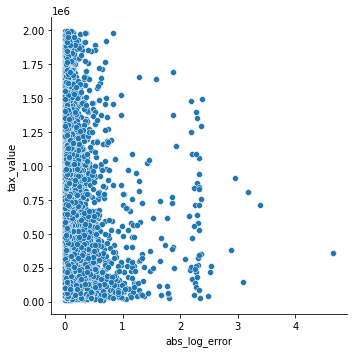

In [89]:
sns.relplot(x=train.abs_log_error, y= train.tax_value )

In [90]:
features = ['sqft','taxamount']

In [91]:
train.log_error.describe()

count    28163.000000
mean         0.018868
std          0.171390
min         -4.655420
25%         -0.024441
50%          0.006555
75%          0.039462
max          3.394544
Name: log_error, dtype: float64

In [92]:
train_scaled

parcelid  bedrooms  bathrooms  calculatedbathnbr  fullbathcnt  \
11303  14498262  0.428571   0.214286                2.5          2.0   
26458  12851739  0.285714   0.142857                2.0          2.0   
28486  11276661  0.428571   0.142857                2.0          2.0   
29814  10902464  0.285714   0.142857                2.0          2.0   
4406   10890115  0.285714   0.142857                2.0          2.0   
...         ...       ...        ...                ...          ...   
16553  11445017  0.285714   0.142857                2.0          2.0   
18488  13891248  0.714286   0.285714                3.0          3.0   
17080  11292243  0.428571   0.142857                2.0          2.0   
14801  17172485  0.142857   0.000000                1.0          1.0   
40175  12334791  0.428571   0.142857                2.0          2.0   

            age  yearbuilt  has_basement  has_deck  has_fireplace  ...  \
11303  0.191176   0.808824             0         0              0  ...   
26458  0.397059   0.602941             0         0              0  ...   
28486  0.169118   0.830882             0         0              0  ...   
29814  0.477941   0.522059             0         0              0  ...   
4406   0.551471   0.448529             0         0              0  ...   
...         ...        ...           ...       ...            ...  ...   
16553  0.448529   0.551471             0         0              0  ...   
18488  0.448529   0.551471             0         0              0  ...   
17080  0.455882   0.544118             0         0              0  ...   
14801  0.470588   0.529412             0         0              1  ...   
40175  0.492647   0.507353             0         0              0  ...   

       cluster_price_size_1  cluster_price_size_2  cluster_price_size_3  \
11303                     0                     0                     0   
26458                     0                     0                     1   
28486                     0                     0                     1   
29814                     0                     0                     1   
4406                      0                     0                     1   
...                     ...                   ...                   ...   
16553                     0                     0                     0   
18488                     1                     0                     0   
17080                     0                     0                     1   
14801                     0                     0                     1   
40175                     0                     0                     1   

       cluster_delinquency_value  cluster_delinquency_value_0  \
11303                          2                            0   
26458                          0                            1   
28486                          0                            1   
29814                          0                            1   
4406                           0                            1   
...                          ...                          ...   
16553                          0                            1   
18488                          2                            0   
17080                          0                            1   
14801                          2                            0   
40175                          0                            1   

       cluster_delinquency_value_1 cluster_delinquency_value_2  \
11303                            0                           1   
26458                            0                           0   
28486                            0                           0   
29814                            0                           0   
4406                             0                           0   
...                            ...                         ...   
16553                            0                           0   
18488                            0         

# Modeling

In [93]:
features_to_model =['log_error','optional_features','has_taxdelinquency','cluster_price_size_0','cluster_price_size_1','cluster_delinquency_value_1','cluster_delinquency_value_2','age']

In [94]:
X_train_scaled,y_train, X_validate_scaled,y_validate, X_test_scaled, y_test = m.model_data_prep(train_scaled, validate_scaled,test_scaled, features_to_model)

In [95]:
X_train_scaled

optional_features  has_taxdelinquency  cluster_price_size_0  \
11303                1.0                   0                     1   
26458                1.0                   0                     0   
28486                1.0                   0                     0   
29814                1.0                   0                     0   
4406                 0.0                   0                     0   
...                  ...                 ...                   ...   
16553                0.0                   0                     1   
18488                1.0                   0                     0   
17080                0.0                   0                     0   
14801                1.0                   0                     0   
40175                0.0                   0                     0   

       cluster_price_size_1  cluster_delinquency_value_1  \
11303                     0                            0   
26458                     0                            0   
28486                     0                            0   
29814                     0                            0   
4406                      0                            0   
...                     ...                          ...   
16553                     0                            0   
18488                     1                            0   
17080                     0                            0   
14801                     0                            0   
40175                     0                            0   

       cluster_delinquency_value_2       age  
11303                            1  0.191176  
26458                            0  0.397059  
28486                            0  0.169118  
29814                            0  0.477941  
4406                             0  0.551471  
...                            ...       ...  
16553                            0  0.448529  
18488                            1  0.448529  
17080                            0  0.455882  
14801                            1  0.470588  
40175                            0  0.492647  

[28163 rows x 7 columns]

In [96]:

#make my ols model
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train_scaled, y_train)
predictions = model.predict(X_train_scaled)



In [97]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)


# 1. Predict urea_pred_mean
log_pred_mean = y_train.log_error.mean()
y_train['logerror_pred_mean'] = log_pred_mean
y_validate['logerror_pred_mean'] =log_pred_mean

# 2. RMSE of urea_pred_mean
rmse_train = mean_squared_error(y_train.log_error,
                                y_train.logerror_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.log_error, y_validate.logerror_pred_mean) ** (1/2)


In [98]:
X_train_scaled.shape

(28163, 7)

In [99]:
y_train

log_error  logerror_pred_mean
11303   0.014676            0.018868
26458  -0.025476            0.018868
28486  -0.084878            0.018868
29814  -0.104920            0.018868
4406   -0.096200            0.018868
...          ...                 ...
16553   0.017411            0.018868
18488   0.138144            0.018868
17080  -0.083443            0.018868
14801  -0.167455            0.018868
40175   0.043003            0.018868

[28163 rows x 2 columns]

In [100]:
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))


RMSE using Mean
Train/In-Sample:  0.17 
Validate/Out-of-Sample:  0.16


In [101]:
def make_metric_df(y, y_pred, model_name, metric_df):
    if metric_df.size ==0:
        metric_df = pd.DataFrame(data=[
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }, ignore_index=True)

In [102]:
# create the metric_df as a blank dataframe
metric_df = pd.DataFrame()
# make our first entry into the metric_df with median baseline
metric_df = make_metric_df(y_train.log_error,
                           y_train.logerror_pred_mean,
                           'mean_baseline',
                          metric_df)

In [103]:
metric_df

model  RMSE_validate  r^2_validate
0  mean_baseline       0.171387           0.0

In [104]:
lm = LinearRegression(normalize=True)
lm.fit(X_train_scaled, y_train.log_error)
y_train['urea_pred_lm'] = lm.predict(X_train_scaled)
rmse_train = mean_squared_error(y_train.log_error, y_train.logerror_pred_mean) ** (1/2)

# predict validate
y_validate['urea_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.log_error, y_validate.logerror_pred_mean) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.1713865643911511 
Validation/Out-of-Sample:  0.16052539622661754


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [105]:
y_validate.logerror_pred_mean

47042    0.018868
46394    0.018868
36724    0.018868
8702     0.018868
31495    0.018868
           ...   
24532    0.018868
18351    0.018868
1637     0.018868
45372    0.018868
29156    0.018868
Name: logerror_pred_mean, Length: 12071, dtype: float64

In [106]:
explained_variance_score(y_validate.log_error, y_validate.logerror_pred_mean)

0.0

In [107]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.log_error, y_validate.logerror_pred_mean)}, ignore_index=True)

/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_1155/2426485517.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df = metric_df.append({


In [108]:
metric_df

model  RMSE_validate  r^2_validate
0  mean_baseline       0.171387           0.0
1  OLS Regressor       0.160525           0.0

In [109]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 =  pf.transform(X_test_scaled)

In [110]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.log_error)

# predict train
y_train['log_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.log_error, y_train.log_pred_lm2) ** (1/2)

# predict validate
y_validate['log_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.log_error, y_validate.log_pred_lm2) ** 0.5

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.17122849985206784 
Validation/Out-of-Sample:  0.1604951680775684


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [111]:
metric_df = make_metric_df(y_validate.log_error,
               y_validate.log_pred_lm2,
               'quadratic',
               metric_df)


/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_1155/1226471474.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metric_df.append(


In [112]:

metric_df[['model', 'RMSE_validate']]

model  RMSE_validate
0  mean_baseline       0.171387
1  OLS Regressor       0.160525
2      quadratic       0.160495

# Models

In [113]:
metric_df

model  RMSE_validate  r^2_validate
0  mean_baseline       0.171387      0.000000
1  OLS Regressor       0.160525      0.000000
2      quadratic       0.160495      0.000346

In [114]:
#make my ols model
from sklearn.linear_model import LinearRegression



def make_metric_df(y, y_pred, model_name, metric_df):
    if metric_df.size ==0:
        metric_df = pd.DataFrame(data=[
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }, ignore_index=True)


features_to_model =['has_taxdelinquency', 'cluster_delinquency_value_1','cluster2' ]



model = LinearRegression().fit(X_train_scaled, y_train)
predictions = model.predict(X_train_scaled)

# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)


# 1. Predict urea_pred_mean
log_pred_mean = y_train.log_error.mean()
y_train['logerror_pred_mean'] = log_pred_mean
y_validate['logerror_pred_mean'] =log_pred_mean

# 2. RMSE of urea_pred_mean
rmse_train = mean_squared_error(y_train.log_error,
                                y_train.logerror_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.log_error, y_validate.logerror_pred_mean) ** (1/2)

lm = LinearRegression(normalize=True)
lm.fit(X_train_scaled, y_train.log_error)
y_train['log_pred_lm'] = lm.predict(X_train_scaled)
rmse_train = mean_squared_error(y_train.log_error, y_train.log_pred_lm) ** (1/2)

# predict validate
y_validate['log_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.log_error, y_validate.log_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.log_error, y_validate.logerror_pred_mean)}, ignore_index=True)


# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree3 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf.transform(X_validate_scaled)
X_test_degree3 =  pf.transform(X_test_scaled)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.log_error)

# predict train
y_train['log_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.log_error, y_train.log_pred_lm2) ** (1/2)

# predict validate
y_validate['log_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.log_error, y_validate.log_pred_lm2) ** 0.5

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

metric_df = make_metric_df(y_validate.log_error,
               y_validate.log_pred_lm2,
               'quadratic',
               metric_df)

metric_df[['model', 'RMSE_validate']]

RMSE for OLS using LinearRegression
Training/In-Sample:  0.17127170752416196 
Validation/Out-of-Sample:  0.1605080716857095
RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.17122849985206784 
Validation/Out-of-Sample:  0.1604951680775684


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_1155/145140461.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df = metric_df.append({
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: 

model  RMSE_validate
0  mean_baseline       0.171387
1  OLS Regressor       0.160525
2      quadratic       0.160495
3  OLS Regressor       0.160508
4      quadratic       0.160495

In [115]:
from sklearn.feature_selection import SelectKBest, f_regression
f_selector = SelectKBest(f_regression, k=5)
f_selector.fit(X_train_scaled, y_train.log_error)
X_reduced = f_selector.transform(X_train_scaled)

f_support = f_selector.get_support()
f_feature = X_train_scaled.loc[:,f_support].columns.tolist()

# you could also get the list this way (among many others)
# f_feature = [X_train_scaled.columns.values[i] for i in range(len(feature_mask)) if feature_mask[i]==True]

print(str(len(f_feature)), 'selected features')
print(f_feature)

5 selected features
['has_taxdelinquency', 'cluster_price_size_0', 'cluster_price_size_1', 'cluster_delinquency_value_1', 'age']


In [116]:
f_support = f_selector.get_support()
f_feature = X_train_scaled.loc[:,f_support].columns.tolist()

# you could also get the list this way (among many others)
# f_feature = [X_train_scaled.columns.values[i] for i in range(len(feature_mask)) if feature_mask[i]==True]

print(str(len(f_feature)), 'selected features')
print(f_feature)

5 selected features
['has_taxdelinquency', 'cluster_price_size_0', 'cluster_price_size_1', 'cluster_delinquency_value_1', 'age']


In [117]:
metric_df

model  RMSE_validate  r^2_validate
0  mean_baseline       0.171387      0.000000
1  OLS Regressor       0.160525      0.000000
2      quadratic       0.160495      0.000346
3  OLS Regressor       0.160508      0.000000
4      quadratic       0.160495      0.000346